# DDM

See the readme file for more information.

## Analysis
Edit the variables in the first cell and run. This will store output in the file FTOneDSlices.txt.

* Binsize - Bin size in pixels for the histogram used in the radial averaging of the Fourier transform (FT).
* analysisradius - Radius of FT radial averaging. Set to 0 for analysis of full FT. Deceasing this value can greatly speed up processing since the number of pixels to average increases as radius^2.
* cutoff - Maximum averaging for each timestep. Set to 0 for analysis of all possible time increments between allimages.
* images_to_load - Number of timesteps to load from disk. Set to 0 for all available images.
* image_directory - Directory path of images to analyse, end with slash.
* file_prefix - Prefix for file. Program assumes files are numbered sequentially from 0 with 4 digits i.e. image_0000.png, image_0001.png...

In [2]:
import ddm

binsize = 1
analysisradius = 100
cutoff = 250
images_to_load = 0
image_directory = "example_images/"
file_prefix = "iii_"
file_suffix = ".png"


ddm.ddm_processing(binsize, analysisradius, cutoff, images_to_load, image_directory, file_prefix, file_suffix)

Loading images.
Image Loading complete. Beginning analysis.


 93%|█████████████████████████████████▋  | 4625/4950 [00:01<00:00, 2997.91it/s]

Analysis Complete. Result saved to FTOneDSlices.txt


100%|████████████████████████████████████| 4950/4950 [00:01<00:00, 3592.24it/s]


## Plotting
The analysis code will now load the file saved from the analysis and plot graphs. There are four plotting functions. These can be tured on and off by commenting or uncommenting them.

For the example files we can see a peak in the intensity of the Fourier difference around 20 pixels. Plotting the Fourier Difference as a function of time for wavevecotrs between 18 and 23 pixels, shows a platau at around 5 seconds. This corresponds well with the relaxation time determined from particle tracking.

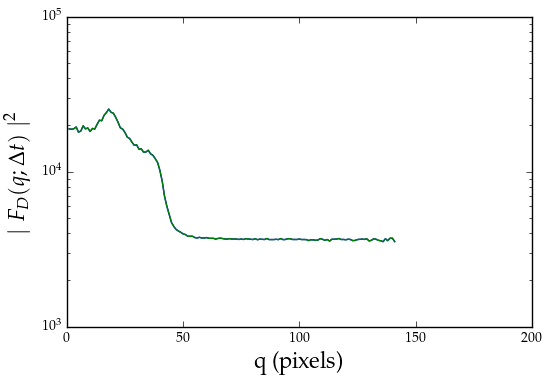

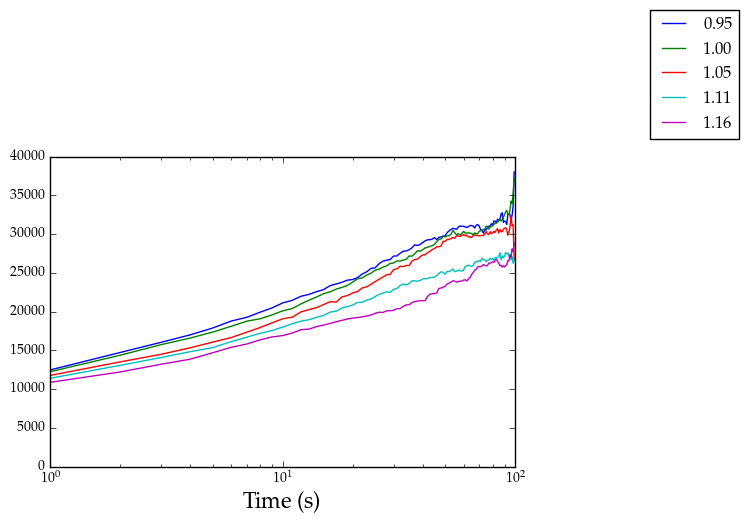

In [4]:
from ddm_data_processing import *

%matplotlib inline


def plotmain():
    list_of_files = ["FTOneDSlices.txt"]
    pixel_size = [20]
    particle_size = [380]
    frame_time = [1]
    wavevectors = (18, 23)

    data = Series(list_of_files, pixel_size, particle_size, frame_time)

    plot_azimuthal_angle(data, frame_number = 20, q_in_pixels=True)
    plot_wavevector_range(data.datasets[0], wavevectors)
    #plot_wavevector_samples(data, wavevector = 25)
    #plot_image(data.datasets[0])
    # Save the data cropped to the specified wavevetors, useful for plotting in Excel or fitting with another program.
    save_series(data, wavevectors)
    
plotmain()